**Simple Linear Regression**

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

**Importing the libraries and reading the dataset**

In [1]:
import pandas as pd
import csv
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn import metrics  

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Data Visualisation**

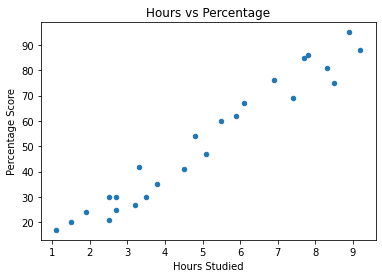

In [3]:
df.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

**Checking for missing values**

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Preparing the data**

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

**Regression Analysis**

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

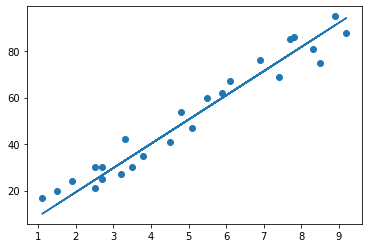

In [8]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [9]:
y_pred = regressor.predict(X_test)

print(y_pred)

[ 9.93952968 32.84320126 18.26813752 86.97915227 48.45934097 78.65054442
 61.99332873 75.52731648]


In [10]:
np.round(y_pred, 2)

array([ 9.94, 32.84, 18.27, 86.98, 48.46, 78.65, 61.99, 75.53])

In [11]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df1.head())

   Actual  Predicted
0      17   9.939530
1      42  32.843201
2      24  18.268138
3      75  86.979152
4      54  48.459341


**Testing the code with own data**

In [12]:
hours = 9.25
hours= np.reshape(hours,(-1, 1))
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.78722212956563


**Model Evaluation**

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.169048271425507
